# Profitable App Profiles for the App Store and Google Play Markets
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.
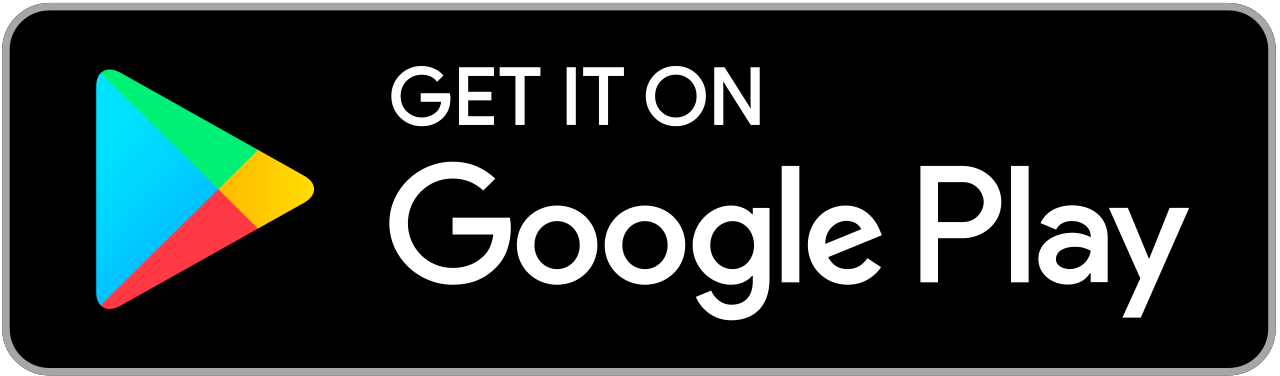!

For this project, we're working as data analysts for a company that builds Android and iOS mobile apps. We make our apps available on Google Play and in the App Store.

# 1. Opening and Exploring the Data

In [1]:
# import libraries
import powerbiclient
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from powerbiclient import (QuickVisualize, 
                           get_dataset_config, 
                           Report)
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
import plotly.offline as pyo
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#function that reads filename(csv) into dataframe
def explore_data(filename):
    df= pd.read_csv(filename)
    #print number of rows and columns
    print('Number of rows and columns:', df.shape)
    return df

our dataframe for appstore contains '7197' rows and '17' columns

In [3]:
# call function for appstore dataset
df_google= explore_data('googleplaystore.csv')

Number of rows and columns: (10841, 13)


In [4]:
# lets print number of columns in each dataset and check missing values
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 2. Data cleaning

There are missing Values in majority of columns only 'rating' column contains alot of missing values. Since majority of missing contains only small percentage less that 5% we shall drop them because the want affect final analysis and for rating column we shall impute using mean strategy

In [5]:
# impute Rating column
df_google['Rating']=df_google['Rating'].fillna(df_google['Rating'].mean())

#df_google.dropna()
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Lets drop duplicates values in 'App' and 'Category' column
df_google.drop_duplicates(subset=['App', 'Category'], inplace=True)
#Since only small percentage contains missing values in other columns we drop
df_google.dropna(inplace= True)
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9733 non-null   object 
 1   Category        9733 non-null   object 
 2   Rating          9733 non-null   float64
 3   Reviews         9733 non-null   object 
 4   Size            9733 non-null   object 
 5   Installs        9733 non-null   object 
 6   Type            9733 non-null   object 
 7   Price           9733 non-null   object 
 8   Content Rating  9733 non-null   object 
 9   Genres          9733 non-null   object 
 10  Last Updated    9733 non-null   object 
 11  Current Ver     9733 non-null   object 
 12  Android Ver     9733 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


As seen in Price and installs columns there are special characters like(+,$) which makes these columns object type, lets clean them

In [7]:
df_google['Price']= df_google['Price'].str.replace('[^+\w\s]', '')
# clean installs column
df_google['Installs']= df_google['Installs'].str.replace('[+,]', '')


In [8]:

# regular expression that identifies non-english chrachers
df_google= df_google[~df_google["App"].str.contains(r"[\u0080-\uFFFF]", regex=True)]
df_google.shape

(9214, 13)

# 3. Correcting data types

From the previous task we noticed that Installs and Price were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters. 
The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. 

In [9]:
# lets convert those columns from object to float
cols= ['Installs', 'Price']
for col in cols:
    df_google[col]= df_google[col].astype(float)
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9214 non-null   object 
 1   Category        9214 non-null   object 
 2   Rating          9214 non-null   float64
 3   Reviews         9214 non-null   object 
 4   Size            9214 non-null   object 
 5   Installs        9214 non-null   float64
 6   Type            9214 non-null   object 
 7   Price           9214 non-null   float64
 8   Content Rating  9214 non-null   object 
 9   Genres          9214 non-null   object 
 10  Last Updated    9214 non-null   object 
 11  Current Ver     9214 non-null   object 
 12  Android Ver     9214 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1007.8+ KB


# 4. Exploring app categories
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

- Which category has the highest share of (active) apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

In [10]:
apps_with_categories= df_google.groupby('Category').size()
sorted_categories= apps_with_categories.sort_values(ascending=False)
# lets count number of unique categories
print('Number of Unique Categories =', len(df_google['Category'].unique()))
sorted_categories

Number of Unique Categories = 33


Category
FAMILY                 1787
GAME                    901
TOOLS                   796
BUSINESS                408
MEDICAL                 389
PRODUCTIVITY            359
PERSONALIZATION         353
LIFESTYLE               345
FINANCE                 331
SPORTS                  300
COMMUNICATION           298
HEALTH_AND_FITNESS      280
PHOTOGRAPHY             271
NEWS_AND_MAGAZINES      236
SOCIAL                  230
BOOKS_AND_REFERENCE     208
TRAVEL_AND_LOCAL        206
SHOPPING                192
DATING                  160
VIDEO_PLAYERS           152
MAPS_AND_NAVIGATION     118
EDUCATION               111
FOOD_AND_DRINK          103
ENTERTAINMENT            96
AUTO_AND_VEHICLES        81
LIBRARIES_AND_DEMO       79
WEATHER                  75
HOUSE_AND_HOME           70
EVENTS                   61
ART_AND_DESIGN           61
PARENTING                56
BEAUTY                   53
COMICS                   48
dtype: int64

We can see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top. Lets create visualization to present the same.

In [11]:

# Trace1
trace1 = go.Bar(
                x=apps_with_categories.index,
                y=sorted_categories,
                name="Category")
               

# Layout
layout = go.Layout(title='Number of apps per category',
                   xaxis=dict(title='Category', tickangle = 40, color= 'gray'),
                   yaxis=dict(title='Number of apps'))

# Data
data = [trace1]

# Figure
fig= go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# 5.Distribution of app ratings
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

According to research which shows that the average volume of ratings across all app categories is 4.17. We will will create histogram to show how these apps are distributed as per rating.

In [12]:
# Average rating of apps
avg_app_rating = 4.17
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = df_google['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})



Average app rating =  4.17


 The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

# 6. Size and price of an app
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

- Does the size of an app affect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

In [13]:
# Subset for categories with at least 250 apps
large_categories = df_google.groupby('Category').filter(lambda x: len(x) >= 250)

# Select apps whose 'Type' is 'Paid'
paid_apps = df_google[df_google['Type'] == 'Paid']

# Plot size vs. rating
fig1 = px.scatter(large_categories, x='Size', y='Rating', color='Category')
fig1.show()

# Plot price vs. rating
fig2 = px.scatter(paid_apps, x='Price', y='Rating')
fig2.show()


We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.

we see that Medical and Family apps are the most expensive. Some medical apps extend even up to 80. All game apps are reasonably priced below $20.

## Popularity of paid apps vs free apps
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

- Free to download.
- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves as an extension of those products.
- Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

- Users are asked to pay once for the app to download and use it.
- The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? 


In [14]:
trace0 = go.Box(
    # Data for paid apps
    y = df_google[df_google['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = df_google[df_google['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]

# Use plotly to create a plot and display it
pyo.iplot({'data': data, 'layout': layout})

It turns out that paid apps have a relatively lower number of installs than free apps

# Conclusion
It is clear that most apps that are downloaded from playstore are free compared to paid apps.
We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.
We can see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.